In [9]:
import os
from matplotlib import pyplot as plt
from skimage.feature import local_binary_pattern
os.chdir('/Users/luisseijas/Library/CloudStorage/GoogleDrive-luisedseijas@gmail.com/My Drive/Docencia_2025/Aprendizaje_profundo/Aprendizaje_profundo_UR')

## Local Binary Pattern

El siguiente fragmento de código carga una imagen en formato de matriz de píxeles, extrae el primer canal (escala de grises) y calcula su patrón binario local (LBP), una técnica común en visión por computadora para la extracción de características basadas en texturas.

### Explicación:

1. Carga la imagen con `plt.imread()`, convirtiéndola en una matriz NumPy3. Aplica trae el canal de intensidad (es`cala de grises) seleccionando `img_a`rrday[:,:,0]`.
3. Aplica Local Binary Pattern (LBP) con `local_binary_pattern(img_aray, 4, 1)`, donde:
    * 4 es el número de puntos en el vecindario circular.
    * 1 e el radio de la vecindad.
4. Muestra la imagen transformada con `plt.imshow(img_lbp_41, cmap='gray')`.

Este proceso ayuda a extraer texturas y patrones en imágenes para tareas de reconocimiento y clasificación en Deep Learning.

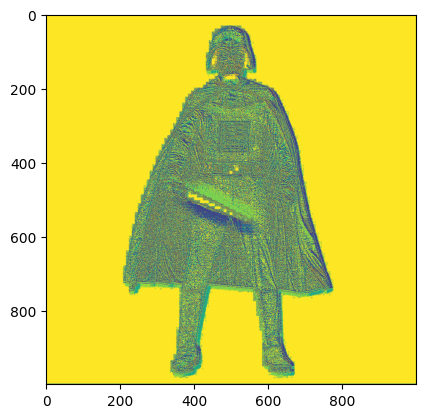

In [13]:
img_array = plt.imread('notebooks/sesion_01/images/darth-vader.jpg')
img_array = img_array[:,:,0]
img_lbp_41 = local_binary_pattern(img_array, 4, 1)
plt.imshow(img_lbp_41)

Este fragmento de código aplica el Patrón Binario Local (LBP) a la imagen en escala de grises con el método "ror" (rotación invariante) y visualiza el resultado.

### Explicación:
1. Aplica LBP con local_binary_pattern(img_array, 4, 1, method='ror'), donde:
    * 4 es el número de puntos vecinos.
    * 1 es el radio de la vecindad.
    * 'ror' (rotation invariant) hace que los valores sean invariantes a rotaciones del patrón.
2. Visualiza la imagen transformada con plt.imshow(img_lbp_41_ror, cmap='gray').

El método 'ror' permite que las características de textura sean más robustas a variaciones angulares, lo que puede ser útil en tareas de reconocimiento y clasificación en Deep Learning.

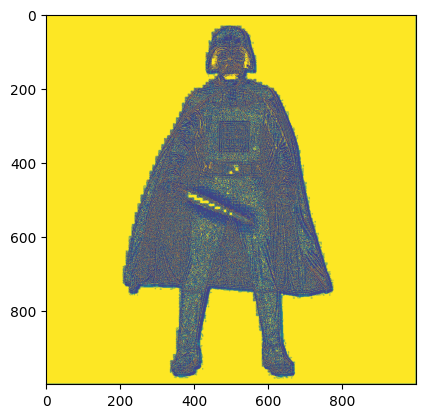

In [14]:
img_lbp_41_ror = local_binary_pattern(img_array, 4, 1, method='ror')
plt.imshow(img_lbp_41_ror)

Este fragmento de código aplica el Patrón Binario Local (LBP) con el método "nri_uniform" (no rotacionalmente invariante pero con patrones uniformes) y visualiza el resultado.

### Explicación:
1. Aplica LBP con local_binary_pattern(img_array, 4, 1, method='nri_uniform'), donde:
    * 4 es el número de puntos vecinos.
    * 1 es el radio de la vecindad.
2. `nri_uniform` permite patrones uniformes (es decir, con pocas transiciones de 0 a 1), pero sin invariancia rotacional.

Visualiza la imagen transformada con `plt.imshow(img_lbp_41_nri_uniform, cmap='gray')`.
El método `nri_uniform` es útil en aplicaciones donde se desea mejorar la discriminación de texturas sin eliminar información direccional.


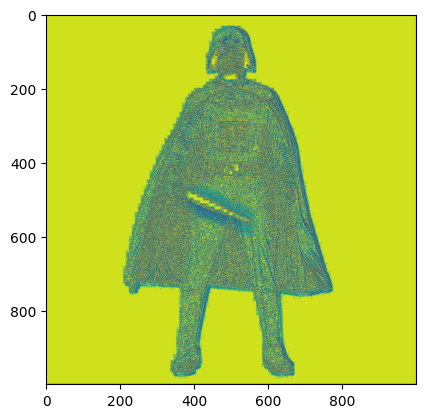

In [15]:
img_lbp_41_nri_uniform = local_binary_pattern(img_array, 4, 1, method='nri_uniform')    
plt.imshow(img_lbp_41_nri_uniform)

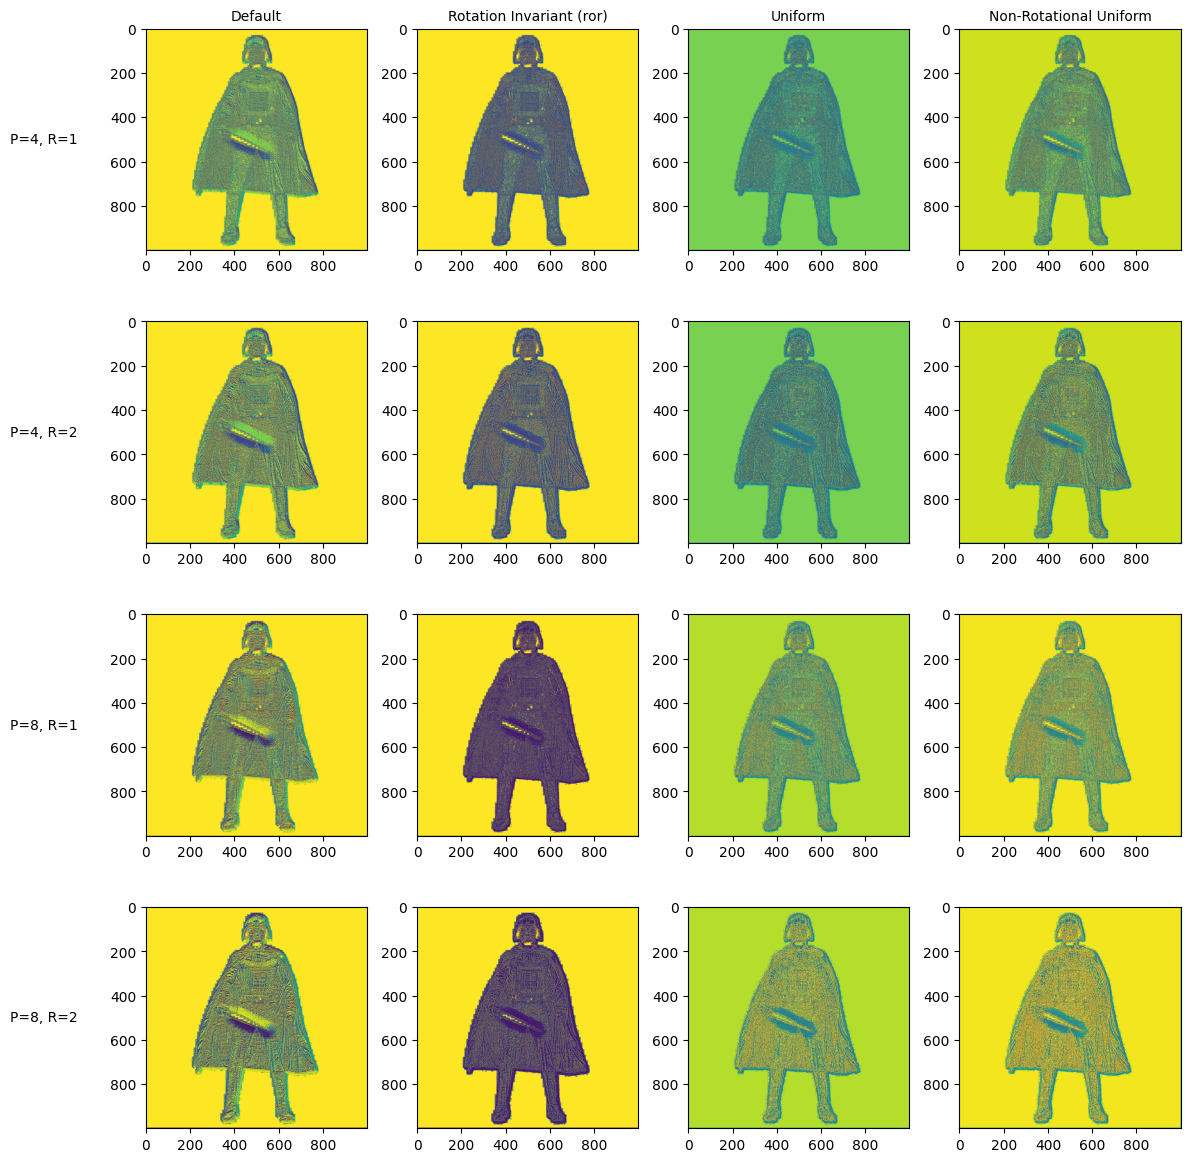

In [23]:
# Parámetros para LBP
params = [(4, 1), (4, 2), (8,1), (8,2)]  # (P, R) pares de valores

# Métodos de LBP
methods = ['default', 'ror', 'uniform', 'nri_uniform']
titles = ['Default', 'Rotation Invariant (ror)', 'Uniform', 'Non-Rotational Uniform']

# Crear figura
fig, axes = plt.subplots(len(params), len(methods), figsize=(12, 12))

# Generar LBP para cada combinación de parámetros y métodos
for col, method in enumerate(methods):
    # Agregar título solo en la parte superior de cada columna
    axes[0, col].set_title(titles[col], fontsize=10)

# Etiquetas de filas para P y R
for row, (P, R) in enumerate(params):
    axes[row, 0].annotate(f'P={P}, R={R}', xy=(0, 0.5), xytext=(-axes[row, 0].yaxis.labelpad - 15, 0),
                          xycoords=axes[row, 0].yaxis.label, textcoords='offset points',
                          ha='right', va='center', fontsize=10)


# Generar LBP para cada combinación de parámetros y métodos
for row, (P, R) in enumerate(params):
    for col, method in enumerate(methods):
        lbp = local_binary_pattern(img_array, P, R, method=method)
        axes[row, col].imshow(lbp)
        axes[row, col].axis('on')


# Ajustar espacio y mostrar
plt.tight_layout()
plt.show()

## Análisis de componentes principales

Supongamos que tienes datos bidimensionales y necesitas encontrar la dirección en la cual la varianza de los datos es máxima. Asume que inicialmente los datos están representados en un sistema de coordenadas $X -Y$, y esta dirección resulta ser 
$M$. Ahora, la dirección que es perpendicular a  $M$, digamos $N$, junto con $M$ forma el nuevo sistema de ejes en el cual los datos originales pueden transformarse y, probablemente, no estén correlacionados.

El Análisis de Componentes Principales encuentra el conjunto de nuevos ejes denominados como Direcciones Principales, en los cuales la variación de los datos es máxima. Esto también puede utilizarse para reducir la dimensionalidad de los datos. Estos componentes principales pueden encontrarse al calcular los valores propios y los vectores propios de la matriz de covarianza de los datos. La matriz de covarianza de los datos puede encontrarse con la siguiente fórmula:

$$
\Sigma = \left(X - \bar{X} \right)^{T} \times (X - \bar{X} )
$$

### Pasos para encontrar el componente principal de $X$

1. Encuentra los valores propios y los vectores propios de la matriz de covarianza $\Sigma$

2. Ordena los valores propios en orden decreciente y reorganiza los vectores correspondientes.

3. Los vectores propios reorganizados se apilan como $autovectores$. Ahora puedes tomar el número deseado de vectores propios.
Finalmente, transforma los datos usando la fórmula:

$$
    X_{transformado} = X \times autovectores
$$

<div style="display: flex; justify-content: center;">

| Matriz          | Dimensiones    |
|:----------------|:---------------|
| $X$             | $n \times m$   |
| $\left(X - \bar{X} \right)$       | $n \times m$   |
| $\Sigma$       | $m \times m$   |
| $X_{transformado}$       | $n \times m$   |
</div>

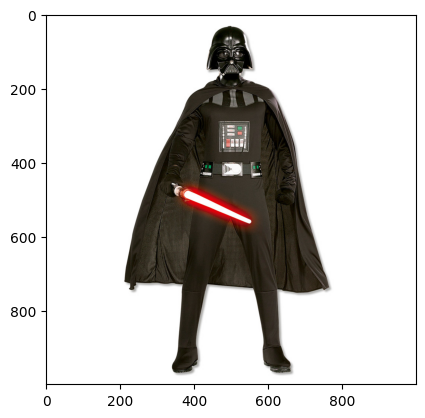

In [24]:
# Importar librerias
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as LA

# carga de la imagen 
img_array = plt.imread('notebooks/sesion_01/images/darth-vader.jpg')
plt.imshow(img_array)

(1000, 1000, 3)
(1000,)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1000, 1)
(1000, 1)
(1000, 1000)


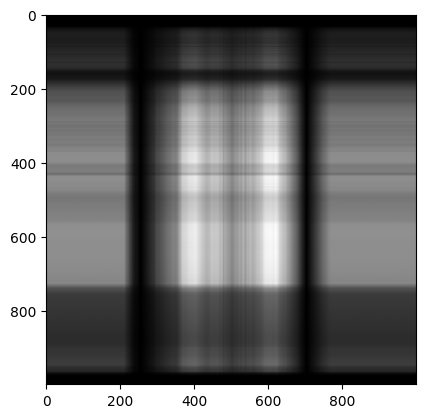

In [34]:
def RGB2GRAY(img):
    img_gray = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    return img_gray

print(img_array.shape)
img_gray = RGB2GRAY(img_array)
X_MEAN = np.mean(img_gray, axis=1)
print(X_MEAN.shape)
X = img_gray
print(X.shape)
X_MEAN = np.reshape(X_MEAN, (X_MEAN.shape[0], 1))
diff = X - X_MEAN
cov1 = np.matmul(diff.T, diff)
print(cov1.shape)
egenva, egenvc = LA.eig(cov1)
print(egenvc.shape)

T1 = egenvc[:,0]
T1 = np.reshape(T1, (T1.shape[0], 1))
print(T1.shape)

trasnformed = np.matmul(X, T1)
print(trasnformed.shape)
recon = np.matmul(trasnformed, T1.T)
print(recon.shape)
plt.imshow(np.abs(recon), cmap='gray')

(1000, 10)
(1000, 10)
(1000, 1000)


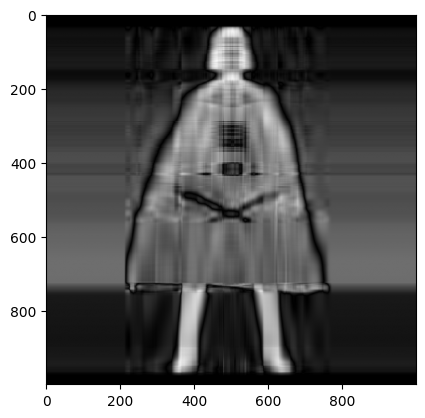

In [37]:
# 10 PCA
T1 = egenvc[:,:10]
print(T1.shape)

trasnformed = np.matmul(X, T1)
print(trasnformed.shape)
recon = np.matmul(trasnformed, T1.T)
print(recon.shape)
plt.imshow(np.abs(recon), cmap='gray')

(1000, 80)
(1000, 80)
(1000, 1000)


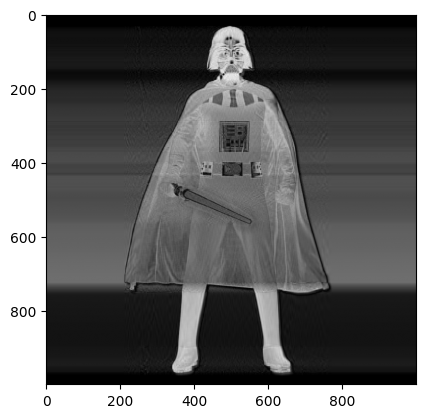

In [38]:
# 80 PC

T1 = egenvc[:,:80]
print(T1.shape)

trasnformed = np.matmul(X, T1)
print(trasnformed.shape)
recon = np.matmul(trasnformed, T1.T)
print(recon.shape)
plt.imshow(np.abs(recon), cmap='gray')

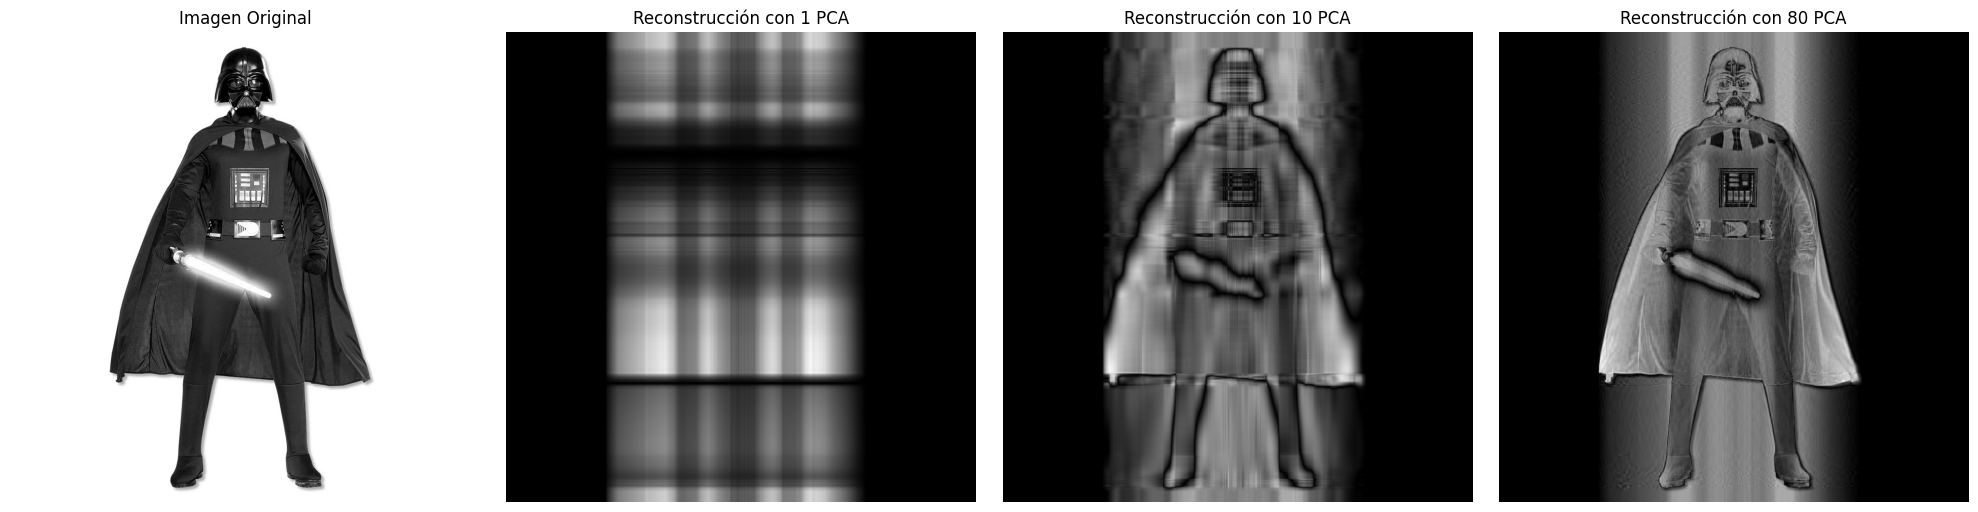

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen
img_array = plt.imread('notebooks/sesion_01/images/darth-vader.jpg')

# Convertir la imagen a escala de grises (si tiene 3 canales)
if img_array.ndim == 3:
    img_array = img_array[:, :, 0]

# Calcular la media y centrar los datos
X = img_array - np.mean(img_array, axis=0)

# Calcular la matriz de covarianza y obtener valores propios y vectores propios
cov_matrix = np.cov(X, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Crear una figura con 4 subgráficos en una columna
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Imagen original
axes[0].imshow(img_array, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Reconstrucción con 1 componente principal
T1 = eigenvectors[:, 0].reshape(-1, 1)
transformed = np.matmul(X, T1)
recon = np.matmul(transformed, T1.T)
axes[1].imshow(np.abs(recon), cmap='gray')
axes[1].set_title('Reconstrucción con 1 PCA')
axes[1].axis('off')

# Reconstrucción con 10 componentes principales
T10 = eigenvectors[:, :10]
transformed = np.matmul(X, T10)
recon = np.matmul(transformed, T10.T)
axes[2].imshow(np.abs(recon), cmap='gray')
axes[2].set_title('Reconstrucción con 10 PCA')
axes[2].axis('off')

# Reconstrucción con 80 componentes principales
T80 = eigenvectors[:, :80]
transformed = np.matmul(X, T80)
recon = np.matmul(transformed, T80.T)
axes[3].imshow(np.abs(recon), cmap='gray')
axes[3].set_title('Reconstrucción con 80 PCA')
axes[3].axis('off')

# Ajustar espacio entre gráficos y mostrar
plt.tight_layout()
plt.show()
